# TP : Préparation et Transformation des Données



## **1. Chargement du dataset**

In [ ]:
# Charger le fichier CSV
import pandas as pd
df = pd.read_csv("/content/sample_data/StudentsPerformance.csv")



In [ ]:
# Afficher les premieres lignes
df.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_norm,reading_norm,writing_norm
0,female,group B,bachelor's degree,standard,none,72,72,74,0.72,0.72,0.74
1,female,group C,some college,standard,completed,69,90,88,0.69,0.90,0.88
2,female,group B,master's degree,standard,none,90,95,93,0.90,0.95,0.93
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.47,0.57,0.44
4,male,group C,some college,standard,none,76,78,75,0.76,0.78,0.75
5,female,group B,associate's degree,standard,none,71,83,78,0.71,0.83,0.78
6,female,group B,some college,standard,completed,88,95,92,0.88,0.95,0.92
7,male,group B,some college,free/reduced,none,40,43,39,0.40,0.43,0.39
8,male,group D,high school,free/reduced,completed,64,64,67,0.64,0.64,0.67
9,female,group B,high school,free/reduced,none,38,60,50,0.38,0.60,0.50


In [ ]:
# Vérifier le type de chaque colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# statistiques de base
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### **Réponses aux questions :**

- Combien de lignes et de colonnes contient le dataset ?
   - Le dataset contient 1000 lignes et 8 colonnes
- Quelles sont les colonnes numériques et catégorielles ?
   - Colonnes numériques : `math score`, `reading score`, `writing score `.
   - Colonnes catégorielles : `gender`,` race/ethnicity`, `parental level of education`, `lunch`, `test preparation course`
- Y a-t-il des valeurs manquantes ?
   - Non, il n'y a aucune valeur manquante dans le dataset

### **2. Exploration des données**

In [ ]:
# Vérifie les doublons:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Statistiques descriptives des notes
df[['math score','reading score','writing score']].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


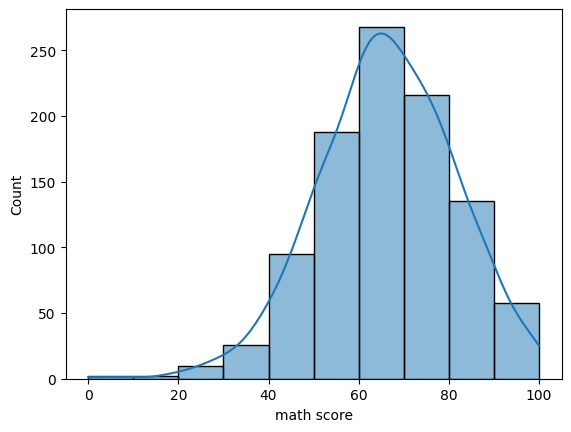

In [ ]:
# Visualisation simple :
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['math score'], bins=10, kde=True)
plt.show()

### Réponses aux questions :


- Quelle est la moyenne et l’écart-type des scores ?
   - `Math score` : Moyenne = 66.09, Écart-type = 15.16.
   - `Reading score` : Moyenne = 69.17, Écart-type = 14.60.
   - `Writing score` : Moyenne = 68.05, Écart-type = 15.20.


- Quelle est la distribution des notes ?
    - Les notes suivent une distribution approximativement normale, centrée autour de 60-70, avec quelques outliers (ex. : 0 et 100). L'histogramme montre une légère asymétrie négative, mais symétrique globalement.

## **3. Nettoyage des données**

In [ ]:
# Supprimer les doublons si existants :
df = df.drop_duplicates()

In [ ]:
# Traiter les valeurs manquantes (si présentes) :
df['math score'] = df['math score'].fillna(df['math score'].mean())
df['reading score'] = df['reading score'].fillna(df['reading score'].median())

In [ ]:
# Uniformisation des textes :
df['gender'] = df['gender'].apply(lambda x: x.lower())
df['lunch'] = df['lunch'].apply(lambda x: x.lower())

### Réponses aux questions :

- Pourquoi utiliser mean pour une colonne et median pour une autre ?
    - La moyenne est adaptée pour des distributions symetriques car elle utilise toutes les valeurs. La médiane est préférable pour des distributions asymétriques ou avec outliers, car elle est robuste et représente mieux le "centre" typique.
- Pourquoi mettre tous les textes en minuscules ?
    - Pour uniformiser les données et éviter les erreurs dues à la casse ("Male" et "male" seraient considérés comme différents). Cela facilite les regroupements en rendant les catégories cohérentes.

### **4. Transformation des données**

In [ ]:
# Normalisation des scores
df['math_norm'] = df['math score'] / df['math score'].max()
df['reading_norm'] = df['reading score'] / df['reading score'].max()
df['writing_norm'] = df['writing score'] / df['writing score'].max()

In [ ]:
# Encodage des variables catégorielles
df['gender_code'] = df['gender'].map({'male':0, 'female':1})
df = pd.get_dummies(df, columns=['lunch', 'test preparation course'])


In [ ]:
# Création de nouvelles variables (feature engineering)
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['pass_math'] = df['math score'].apply(lambda x: 1 if x >= 50 else 0)

## Réponses aux questions

- Pourquoi normaliser les scores ?
   - Pour mettre les variables numériques sur des échelles comparables (ex. : 0-1), évitant que des variables avec de grandes valeurs dominent les modèles ML.
- Pourquoi encoder les variables catégorielles avant un modèle ML ?
   - La plupart des algorithmes ML nécessitent des entrées numériques. Les textes ne peuvent pas être traités directement
- Que représente la variable pass_math ?
    - C'est un indicateur binaire de réussite en maths : 1 si la note est >=50 (réussite), 0 sinon (échec).

### **5. Exportation des données préparées**

In [ ]:
df.to_csv("StudentsPerformance_cleaned.csv", index=False)